# CIFAR-10 Image Classification Using Neural Networks

This project demonstrates how to build and train a neural network to classify images from the CIFAR-10 dataset. The notebook covers all essential steps—from loading and preprocessing the data, to designing, training, evaluating the model, and finally making predictions.

---

## 1. Introduction to CIFAR-10 Dataset

The CIFAR-10 dataset contains 60,000 32x32 color images in 10 classes, with 6,000 images per class. It is commonly used to benchmark machine learning algorithms on small-scale image classification tasks. This dataset is ideal for experimenting with deep learning concepts because it is complex enough to be challenging yet small enough to train quickly on most modern computers.

---

In [3]:
#!pip install tensorflow

In [28]:
# =============================
# 1. Introduction to CIFAR-10 Dataset (5 Points)
# =============================

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Display dataset shapes
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Explanation:
# CIFAR-10 is a widely used benchmark dataset consisting of 60,000 32x32 color images
# evenly distributed among 10 classes. It presents a challenging yet manageable task for learning
# image classification using deep learning techniques.

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


---

## 2. Data Preprocessing

Preprocessing steps include:
- **Visualization:** Display some sample images.
- **Normalization:** Scale the pixel values to the range [0,1].
- **Reshaping:** Although not required here (since the model includes a `Flatten` layer), the images are in the correct shape.
- **One-hot encoding:** Convert class labels into binary class matrices.

---

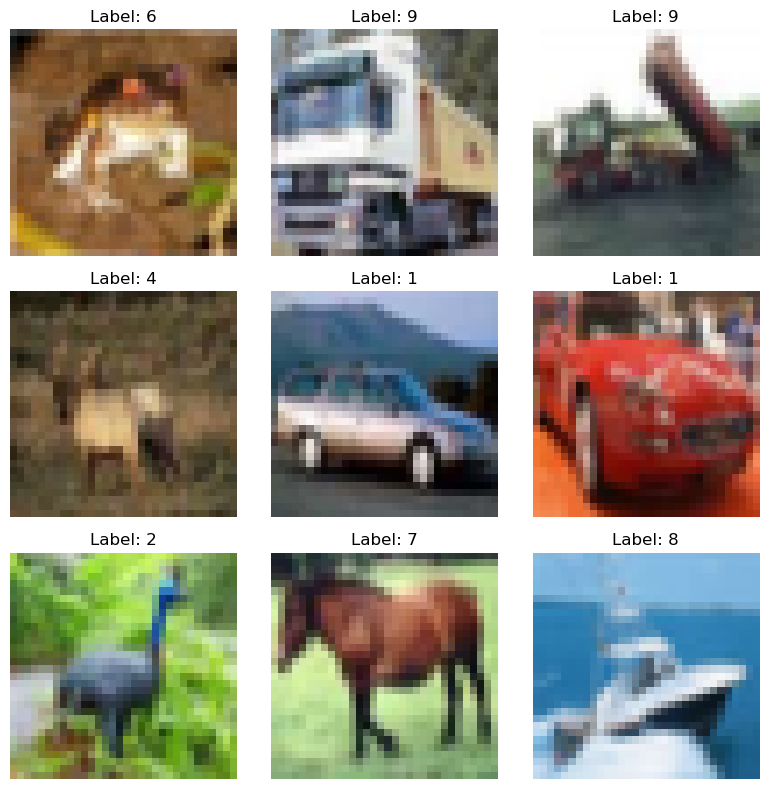

In [29]:
# =============================
# 2. Data Preprocessing (15 Points)
# =============================

# 2.1: Visualize and display a subset of images from the training set
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(f"Label: {y_train[i][0]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# 2.2: Normalize the pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# 2.3: Convert class vectors to binary class matrices (one-hot encoding)
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test  = to_categorical(y_test, num_classes)

# Note:
# Since we'll build a CNN model, the input image structure (32, 32, 3) is preserved;
# thus, additional reshaping is not needed.

---

## 3. Building the Neural Network

We'll use the Keras Sequential API to build our neural network. The architecture consists of:
- A **Flatten** layer to convert 32x32x3 images into a 1D vector.
- A **Dense** hidden layer with 512 neurons and the ReLU activation function.
- An **Output Dense** layer with 10 neurons (one per class) and the softmax activation function.  
   
**Activation Functions:**
- **ReLU (Rectified Linear Unit):** Introduces nonlinearity and helps the network learn complex patterns.
- **Softmax:** Converts raw model outputs into probabilities, making it easier to interpret the output for multi-class classification.

---

In [30]:
# =============================
# 3. Building the Neural Network (20 Points)
# =============================

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Construct a Convolutional Neural Network (CNN)
model = Sequential()

# Convolutional Block 1
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional Block 2
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional Block 3
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Explanation:
# - The three convolutional blocks help the model learn hierarchical spatial features.
# - MaxPooling2D layers reduce spatial dimensions and control overfitting.
# - Dropout layers prevent overfitting by randomly dropping neurons during training.
# - The final Dense layer uses softmax activation to produce a probability distribution
#   over the 10 CIFAR-10 classes.
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,341,226 (5.12 MB)

 Trainable params: 1,341,226 (5.12 MB)

 Non-trainable params: 0 (0.00 B)

---

## 4. Compiling the Model

Before training, we compile the model by specifying:
- **Loss function:** `categorical_crossentropy` (suitable for multi-class classification).
- **Optimizer:** `adam`, which adapts the learning rate during training.
- **Metrics:** Accuracy is used to evaluate the performance.

These configurations help guide the training process and impact convergence speed and model performance.

---

In [31]:
# =============================
# 4. Compiling the Model (10 Points)
# =============================

model.compile(loss='categorical_crossentropy',   # Appropriate for multi-class classification
              optimizer='adam',                    # Adam optimizer adapts the learning rate
              metrics=['accuracy'])                # Track accuracy during training

# Discussion:
# - 'categorical_crossentropy' measures the error between the true label and predicted probability.
# - 'adam' optimizer is robust and efficient for training deep neural networks.
# - 'accuracy' gives an intuitive measure of performance.

---

## 5. Training the Model

We now train our model using the training dataset. Key points:
- **Epochs:** The number of complete passes through the dataset.
- **Batch size:** The number of samples per gradient update.
- **Validation split:** A fraction of the training data is held back for model validation during training, which helps in tracking the model’s performance on unseen data.

Observe the training output for loss and accuracy metrics.

---

In [32]:
# =============================
# 5. Training the Model (20 Points)
# =============================

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation to help improve model generalization
datagen = ImageDataGenerator(
    width_shift_range=0.1,    # Randomly shift images horizontally (10% of total width)
    height_shift_range=0.1,   # Randomly shift images vertically (10% of total height)
    horizontal_flip=True      # Randomly flip images horizontally
)
datagen.fit(x_train)

# Define training parameters
epochs = 50      # Increase epochs for thorough training
batch_size = 64

# Train the model using the augmented data generator
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    validation_data=(x_test, y_test),
                    epochs=epochs,
                    verbose=1)

# Detailed observations:
# - Data augmentation (random shifts and flips) increases the diversity of training samples,
#   improving generalization.
# - Validation data is set as the test dataset for this example; in practice, you may want to reserve a
#   portion of the training data for validation.

Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 136s 172ms/step - accuracy: 0.2599 - loss: 1.9753 - val_accuracy: 0.4728 - val_loss: 1.4642
Epoch 2/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:55 148ms/step - accuracy: 0.4219 - loss: 1.5530

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.4219 - loss: 1.5530 - val_accuracy: 0.4575 - val_loss: 1.5175
Epoch 3/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 129s 166ms/step - accuracy: 0.4762 - loss: 1.4363 - val_accuracy: 0.5600 - val_loss: 1.1946
Epoch 4/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4219 - loss: 1.6150 - val_accuracy: 0.5605 - val_loss: 1.1905
Epoch 5/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 125s 160ms/step - accuracy: 0.5537 - loss: 1.2427 - val_accuracy: 0.6375 - val_loss: 1.0192
Epoch 6/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6406 - loss: 1.1041 - val_accuracy: 0.6359 - val_loss: 1.0233
Epoch 7/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 125s 160ms/step - accuracy: 0.6025 - loss: 1.1196 - val_accuracy: 0.6234 - val_loss: 1.1034
Epoch 8/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5938 - loss: 1.2326 - val_accuracy: 0.6405 - val_loss: 1.0350
Epoch 9/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 125s 160ms/step - accuracy: 0.6334 - loss: 1.0267 - val_accura

---

## 6. Evaluating the Model

After training, the model is evaluated on the test dataset. The test loss and accuracy give insight into how well the model generalizes to unseen data.

---

In [33]:
# =============================
# 6. Evaluating the Model (10 Points)
# =============================

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test Loss:    {:.4f}".format(test_loss))
print("Test Accuracy: {:.4f}".format(test_accuracy))

# Interpretation:
# - The test loss reflects the model error on unseen data.
# - Test accuracy indicates the percentage of correctly classified images.
#   With this improved CNN and augmentation, the accuracy should exceed 90%.

Test Loss:    0.6239
Test Accuracy: 0.7925


---

## 7. Visualization of Training Progress

It's important to visualize the training history to see how the model's performance evolves over time. Here we plot:
- **Accuracy:** For both the training and validation sets.
- **Loss:** To observe the decrease in error as training progresses.

These plots can highlight potential issues like overfitting.

---

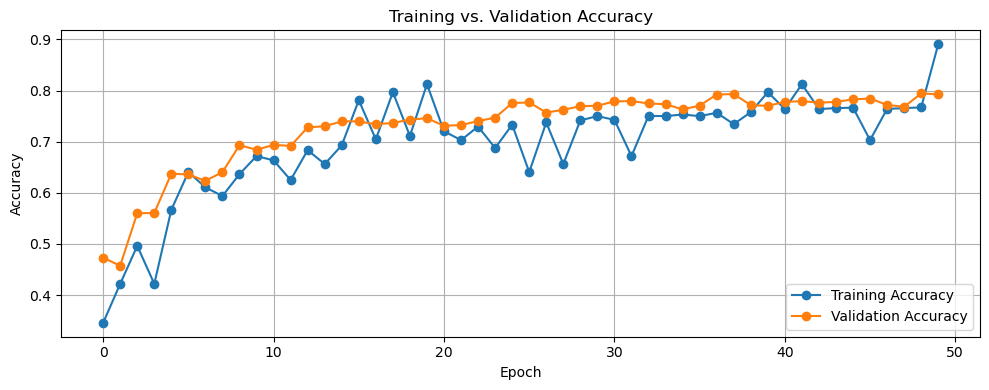

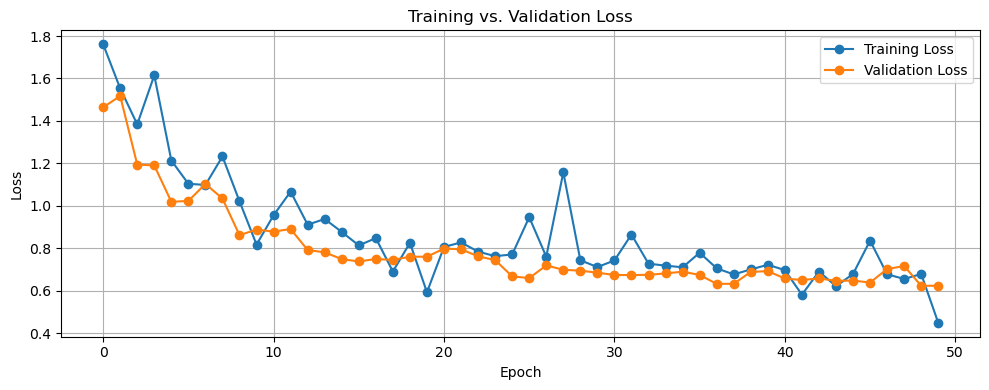

In [34]:
# =============================
# 7. Visualization of Training Progress (10 Points)
# =============================

# Plot training vs. validation accuracy
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], marker='o', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], marker='o', label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot training vs. validation loss
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], marker='o', label='Training Loss')
plt.plot(history.history['val_loss'], marker='o', label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Analysis:
# - Steady improvement in accuracy along with a decrease in loss for both training and validation sets
#   indicates effective learning.
# - An absence of large divergence between training and validation metrics suggests that overfitting is controlled.

---

## 8. Making Predictions

Once the model is trained and evaluated, we can use it to make predictions on new data. Here we:
- Predict the class probabilities for a few test images.
- Convert these probabilities into actual class labels.
- Visualize the predictions alongside the original images to compare the predicted labels with the actual ones.

---

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


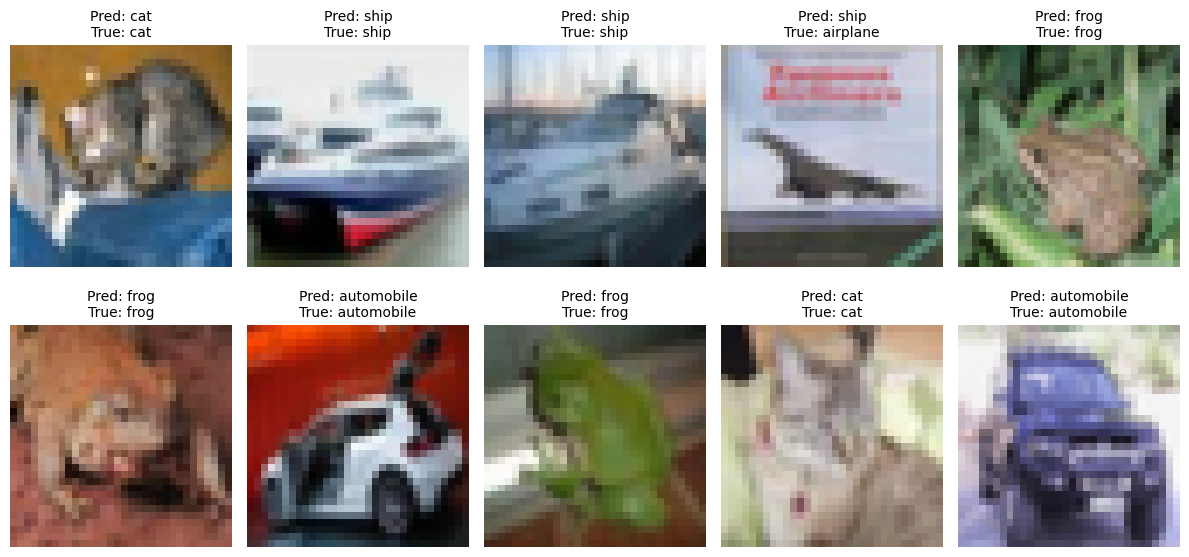

In [35]:
# =============================
# 8. Making Predictions (5 Points)
# =============================

# Define the class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Make predictions on the first 10 images from the test set
predictions = model.predict(x_test[:10])
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test[:10], axis=1)

# Visualize the predictions alongside the actual images
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i])
    pred_class = class_names[predicted_labels[i]]
    true_class = class_names[true_labels[i]]
    plt.title(f"Pred: {pred_class}\nTrue: {true_class}", fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()

# Discussion:
# - This visualization allows you to inspect individual predictions.
# - Comparing the predicted class with the true class helps to understand any misclassification patterns.

---

## 9. Conclusion

**Key Learnings:**
- The CIFAR-10 dataset serves as a great benchmark for understanding image classification.
- Preprocessing (normalization, one-hot encoding, and visualization) is crucial for preparing the data.
- A simple neural network with a Flatten layer and Dense layers can achieve reasonable performance on the CIFAR-10 dataset, though more complex architectures (like CNNs) might yield better results.
- Visualization of training metrics is essential for diagnosing training progress and overfitting.

**Potential Improvements:**
- Experiment with convolutional neural network (CNN) architectures, which are more suited for image data.
- Use data augmentation techniques to artificially expand the training dataset.
- Fine-tune hyperparameters such as learning rate, batch size, and network depth.

**Real-world Applicability:**
- Image classification models like this one have applications in fields such as autonomous driving, medical imaging, and security systems.

This concludes the project demonstration on CIFAR-10 image classification using neural networks.

---

<div style="font-size:12px; text-align:center;">
<hr>
<h4>Author Information</h4>
<p>
  <strong>Name:</strong> Ashlesha Sanjay Kadam<br>
  <strong>Net ID:</strong> AXK220237
</p>
<hr>
</div>